In [1]:
import numpy as np
import os

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'font.size': 14
})

SAVE_FIG = True

def save_fig(name, tight_layout = True, pad=0.5):
    if SAVE_FIG:
        if not os.path.isdir("plots"):
            os.mkdir("plots")
        print(f"Saving figure {name} ...")
        if tight_layout:
            plt.tight_layout(pad=pad)
        plt.savefig(f"plots/{name}.pdf", backend="pgf")

In [2]:
rng = np.random.default_rng(seed=42)

In [3]:
from matplotlib.patches import ConnectionPatch

def plot_gradient_descent(f, df, start, n_iterations=100, alpha=0.1, arrow_cb=None, up=None) -> np.ndarray:
    def plot_tangente(m, x, **styles):
        y = f(x)

        b = y - m * x

        x1 = -1000
        y1 = m * x1 + b

        x2 = 1000
        y2 = m * x2 + b

        plt.plot([x1, x2], [y1, y2], "--", linewidth=0.8, **styles)

    x = start

    x_prev = None
    y_prev = None

    for i in range(n_iterations):
        y = f(x)
        m = df(x)
          
        if i == 0:
            plot_tangente(m, x, c="dodgerblue")
            label = f"$x^{{({up})}}_{{start}} = {x}$" if up else f"$x_{{start}} = {x}$"
            plt.plot(x, y, ".", c="dodgerblue", label=label)
        else:
            plt.plot(x, y, "r.")

        if x_prev and arrow_cb:
            arrow_cb(i, [x_prev, y_prev], [x, y])

        x_prev = x
        y_prev = y

        x = x - alpha * m
    
    y = f(x)
    m = df(x)

    label = f"$x^{{({up})}}_{{min}} = {x:1.4f}$" if up else f"$x_{{min}} = {x:1.4f}$"
    plt.plot(x, y, "g.", label=label)

    plot_tangente(m, x, c="g")

    return x

In [4]:
def gradient_descent(df, start, n_epochs=50, learning_rate=0.01):
    x = start
    for _ in range(n_epochs):
        gradient = df(x)
        x = x - learning_rate * gradient
    return x

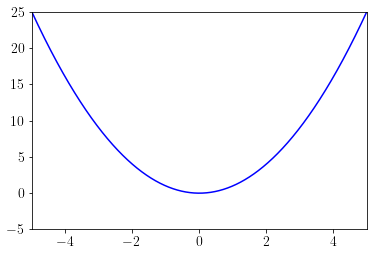

In [5]:
def f(x):
    return x**2

def df(x):
    return 2 * x

xf = np.linspace(-5, 5, 2000)
yf = f(xf)

plt.plot(xf, yf, "b-")
plt.axis([-5, 5, -5, 25])
plt.show()

In [6]:
x_min = gradient_descent(df, 100, n_epochs=1000, learning_rate=0.1)
x_min

1.2302319221611203e-95

Saving figure gd ...


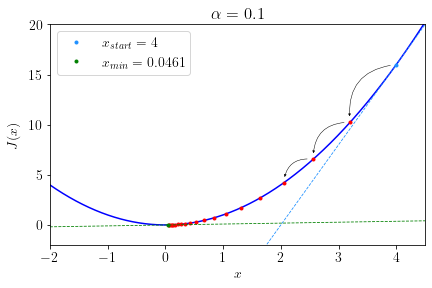

In [7]:
plt.plot(xf, yf, "b-")

def arrow_cb1(i, p1, p2):
    if i < 4:
        cnn = ConnectionPatch(p1, p2, "data", "data",
            arrowstyle="-|>, head_length=0.2, head_width=0.1",
            shrinkA=6,
            shrinkB=6,
            linewidth=0.5,
            connectionstyle="arc3,rad=.5",
            facecolor="black")
        plt.gca().add_artist(cnn)

x_min = plot_gradient_descent(f, df, start=4, n_iterations=20, alpha=0.1, arrow_cb=arrow_cb1)

plt.axis([-2, 4.5, -2, 20])
plt.title(r"$\alpha = 0.1$")
plt.xlabel("$x$")
plt.ylabel("$J(x)$", labelpad=8)
plt.legend()
save_fig("gd")
plt.show()

Saving figure gd-low-lr ...


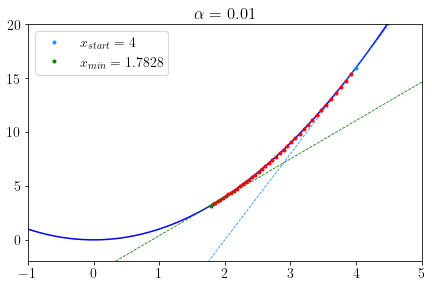

In [8]:
plt.plot(xf, yf, "b-")

x_min = plot_gradient_descent(f, df, start=4, n_iterations=40, alpha=0.01)

plt.axis([-1, 5, -2, 20])
plt.title(r"$\alpha = 0.01$")
plt.legend()
save_fig("gd-low-lr")
plt.show()

Saving figure gd-high-lr ...


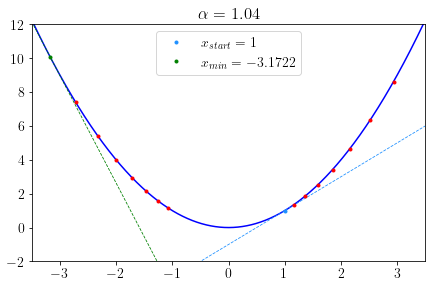

In [9]:
plt.plot(xf, yf, "b-")

x_min = plot_gradient_descent(f, df, start=1, alpha=1.04, n_iterations=15)
plt.axis([-3.5, 3.5, -2, 12])

plt.title(r"$\alpha = 1.04$")
plt.legend(loc="upper center")
save_fig("gd-high-lr")
plt.show()

Saving figure mulitple-minima ...


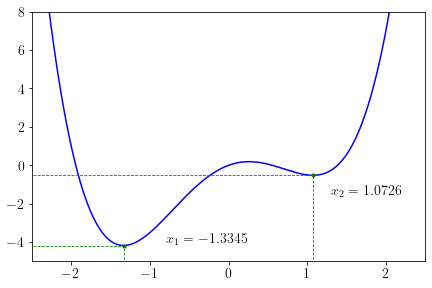

In [10]:
def g(x):
    return x**4 - 3*x**2 + 1.5*x

def dg(x):
    return 4*x**3 - 6*x + 1.5

xg = np.linspace(-3, 3, 2000)
yg = g(xg)

plt.plot(xg, yg, "b-")
plt.axis([-2.5, 2.5, -5, 8])

x_min = gradient_descent(dg, start=-2, n_epochs=1000, learning_rate=0.01)
y_min = g(x_min)

plt.plot(x_min, y_min, "g.")
plt.plot([x_min, x_min], [-100, y_min], "g--", linewidth=0.8)
plt.plot([-100, x_min], [y_min, y_min], "g--", linewidth=0.8)
plt.text(-0.8, -4, r"$x_1 = {:1.4f}$".format(x_min))

x_min = gradient_descent(dg, start=2, n_epochs=1000, learning_rate=0.01)
y_min = g(x_min)

plt.plot(x_min, y_min, "g.")
plt.plot([x_min, x_min], [-100, y_min], "g--", linewidth=0.8)
plt.plot([-100, x_min], [y_min, y_min], "g--", linewidth=0.8)
plt.text(1.3, -1.5, r"$x_2 = {:1.4f}$".format(x_min))

save_fig("mulitple-minima")
plt.show()

Saving figure gd-mulitple-minima ...


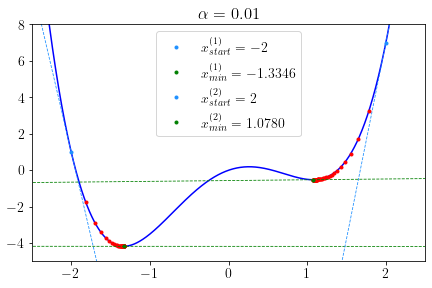

In [11]:
plt.plot(xg, yg, "b-")
plt.axis([-2.5, 2.5, -5, 8])

x_min1 = plot_gradient_descent(g, dg, start=-2, alpha=0.01, n_iterations=50, up=1)
x_min2 = plot_gradient_descent(g, dg, start=2, alpha=0.01, n_iterations=50, up=2)

plt.title(r"$\alpha = 0.01$")

plt.legend()
save_fig("gd-mulitple-minima")
plt.show()

Saving figure mse_3d_plot ...
Saving figure mse_contour_plot ...


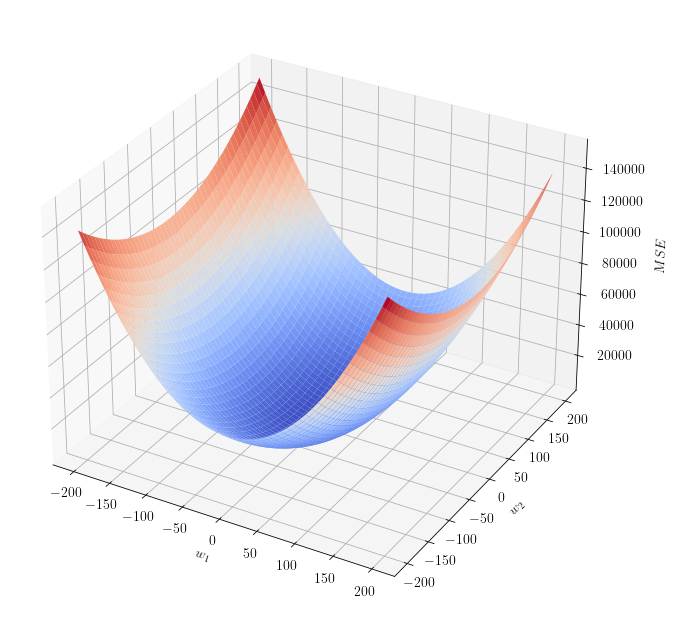

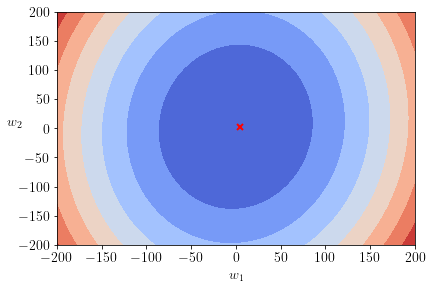

In [12]:
from matplotlib import cm

X = 6 * rng.random((100, 1)) - 3
y = X ** 2

def plot_mse_function():
    def MSE(X, y, theta):
        m = y.shape[0]
        square_sum = ((X @ theta - y) ** 2).sum()
        return 1/m * square_sum

    X_pad = np.c_[np.ones(X.shape), X]

    theta_0 = np.linspace(-200, 200, 200)
    theta_1 = np.linspace(-200, 200, 200)

    xx, yy = np.meshgrid(theta_0, theta_1)

    errors = []
    for th0 in theta_0:
        for th1 in theta_1:
            mse = MSE(X_pad, y, np.array([[th0], [th1]]))
            errors.append(mse)

    errors = np.array(errors).reshape(xx.shape)

    fig = plt.figure(figsize=[10, 10])
    ax = fig.add_subplot(projection="3d")
    ax.set_xlabel(r"$w_1$")
    ax.set_ylabel(r"$w_2$")
    ax.set_zlabel("$MSE$", labelpad=28)
    ax.tick_params("z", pad=15)
    ax.plot_surface(xx, yy, errors, cmap=cm.coolwarm)
    save_fig("mse_3d_plot", pad=4)

    fig = plt.figure()
    ax = fig.add_subplot()
    ax.set_xlabel(r"$w_1$")
    ax.set_ylabel(r"$w_2$", rotation=0)
    ax.contourf(xx, yy, errors, cmap=cm.coolwarm)
    ax.plot(5, 3, "rx", markeredgewidth=2)
    save_fig("mse_contour_plot")

    plt.show()

plot_mse_function()